In [23]:
#import matplotlib.pyplot as plt
#plt.style.use('seaborn')

In [24]:
import pandas as pd
PRIMARY = 'Category Name'
SECONDARY = 'Order Region'

df = pd.read_csv('data.csv', usecols = [PRIMARY, SECONDARY], encoding = 'unicode_escape').apply(lambda col: col.str.strip())
df.head()

Category Name    Order Region
0  Sporting Goods  Southeast Asia
1  Sporting Goods      South Asia
2  Sporting Goods      South Asia
3  Sporting Goods         Oceania
4  Sporting Goods         Oceania

In [25]:
# Check & remove null + duplicate values
df.isnull().sum().sort_values(ascending=False)

Category Name    0
Order Region     0
dtype: int64

In [26]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 162002
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category Name  691 non-null    object
 1   Order Region   691 non-null    object
dtypes: object(2)
memory usage: 16.2+ KB


In [27]:
# Convert DataFrame to Graphs
primary_col, secondary_col = df[PRIMARY], df[SECONDARY]
print(f'Number of {PRIMARY}:', primary_col.nunique())
print(f'Number of {SECONDARY}:', secondary_col.nunique())
print('Number of edges:', len(df))

Number of Category Name: 50
Number of Order Region: 23
Number of edges: 691


In [28]:
# Bipartite Graph
import networkx as nx
from networkx.algorithms import bipartite

B = nx.Graph()
for index, row in df.iterrows():
    B.add_edge(row[PRIMARY], row[SECONDARY], weight=1)

B.add_nodes_from(primary_col, bipartite=0)
B.add_nodes_from(secondary_col, bipartite=1)    

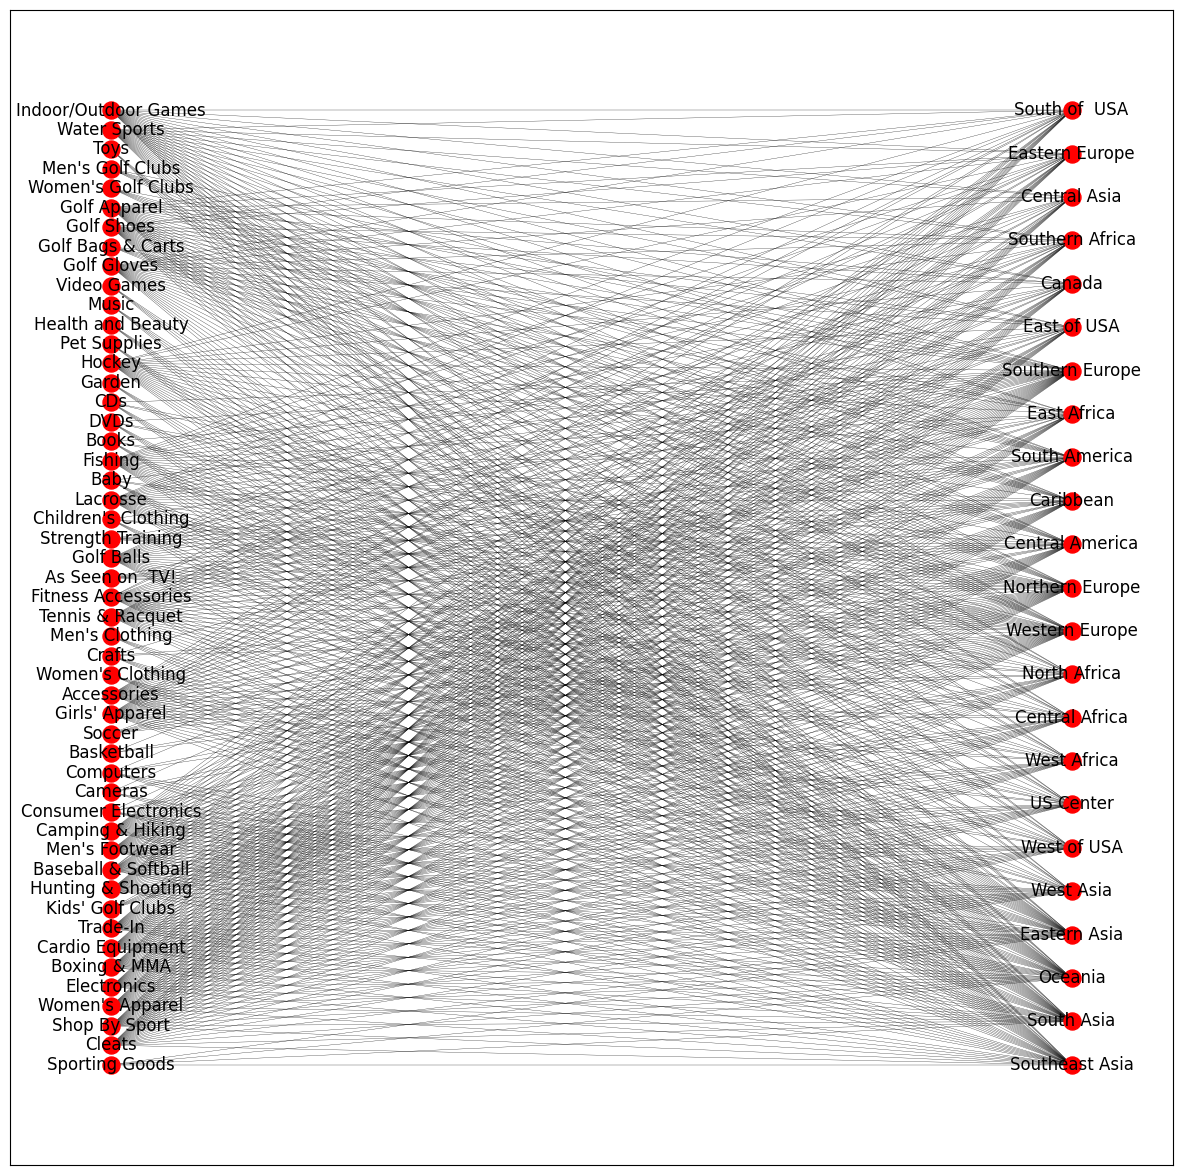

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
pos = nx.drawing.layout.bipartite_layout(B, primary_col)
nx.draw_networkx(B, pos=pos, node_size=150, width=0.2, node_color='red')

In [30]:
# Weighted Projected Graph
#G = bipartite.weighted_projected_graph(B, primary_col)
#node_labels = dict(zip(primary_col, primary_col))
#nx.to_pandas_edgelist(G).to_csv('Edges table.csv', index=False)

# Weighted Projected Graph
G = bipartite.weighted_projected_graph(B, list(set(primary_col))) # Remove duplicates from primary_col
node_labels = dict(zip(primary_col, primary_col))
nx.to_pandas_edgelist(G).to_csv('Edges table.csv', index=False)

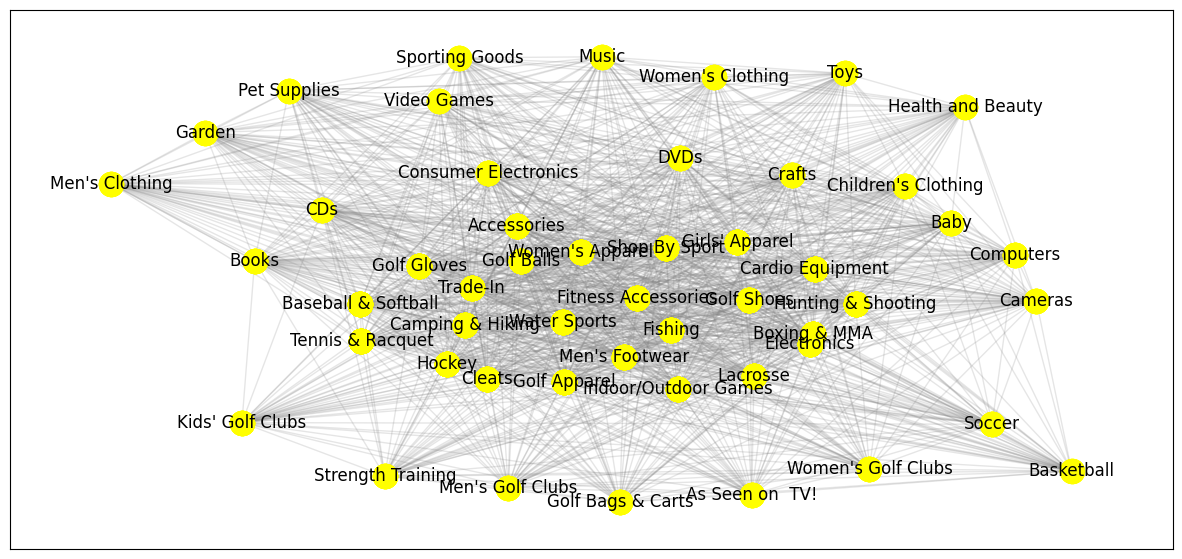

In [31]:
plt.figure(figsize=(15, 7))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=primary_col, node_color='yellow')
nx.draw_networkx_edges(G, pos, edge_color='grey', alpha=0.2)
nx.draw_networkx_labels(G, pos, labels=node_labels)
plt.show()

In [32]:
# Cliques
cliques = list(nx.find_cliques(G))
print('Number of cliques:', len(cliques))
for index, clique in enumerate(cliques): 
    print(f'\nClique {index}:', clique)

Number of cliques: 2

Clique 0: ['Shop By Sport', 'Baby', 'Hunting & Shooting', 'Boxing & MMA', 'Cameras', 'Computers', 'Books', 'DVDs', 'Golf Balls', 'Golf Gloves', 'Accessories', 'Water Sports', 'Cardio Equipment', 'Cleats', "Girls' Apparel", "Men's Footwear", 'CDs', 'Crafts', 'Lacrosse', "Children's Clothing", 'Electronics', 'Hockey', 'Golf Shoes', 'Indoor/Outdoor Games', 'Fitness Accessories', "Women's Apparel", 'Trade-In', 'Tennis & Racquet', 'Camping & Hiking', 'Baseball & Softball', 'Golf Apparel', 'Fishing', 'Consumer Electronics', 'Pet Supplies', 'Garden', 'Video Games', "Men's Clothing", "Women's Clothing", 'Health and Beauty', 'Toys', 'Sporting Goods', 'Music']

Clique 1: ['Shop By Sport', 'Baby', 'Hunting & Shooting', 'Boxing & MMA', 'Cameras', 'Computers', 'Books', 'DVDs', 'Golf Balls', 'Golf Gloves', 'Accessories', 'Water Sports', 'Cardio Equipment', 'Cleats', "Girls' Apparel", "Men's Footwear", 'CDs', 'Crafts', 'Lacrosse', "Children's Clothing", 'Electronics', 'Hockey', 

In [33]:
# Network Centrality
def print_centrality(centrality, name):
    result = pd.DataFrame(centrality.items(), columns=['Category Name', name])
    result.sort_values(name, ascending=False, inplace=True)
    print(result.to_records(index=False).tolist())
    return result

In [34]:
def plot_centrality(centrality):
    plt.figure(figsize=(15, 7))
    node_color = [centrality[i] for i in centrality.keys()]

    cmap = plt.cm.ScalarMappable(
        cmap = 'Wistia', 
        norm = plt.Normalize(vmin=min(node_color), vmax=max(node_color))
    )
    cmap.set_array([])
    plt.colorbar(cmap)

    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap='Wistia')
    nx.draw_networkx_edges(G, pos, edge_color='grey', alpha=0.2)
    nx.draw_networkx_labels(G, pos)
    plt.show()

In [35]:
# Degree Centrality
degree = dict(nx.degree(G))
plot_centrality(degree)
print_centrality(degree, 'Degree Centrality').head()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

<Figure size 1500x700 with 0 Axes>

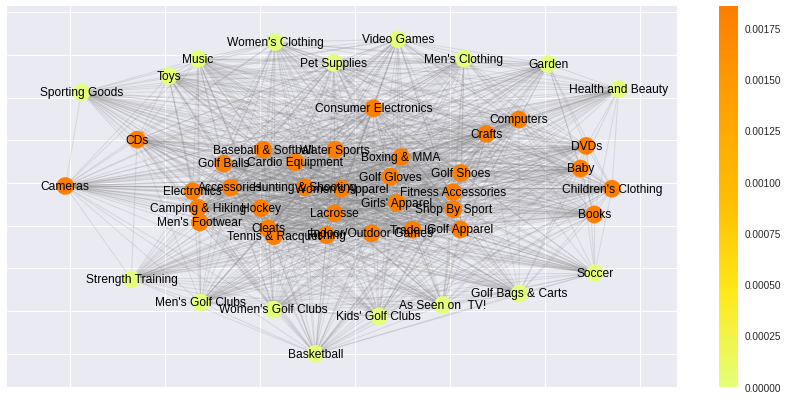

[('Indoor/Outdoor Games', 0.0018552875695732828), ("Girls' Apparel", 0.0018552875695732828), ('Golf Apparel', 0.0018552875695732828), ('Tennis & Racquet', 0.0018552875695732828), ('Fitness Accessories', 0.0018552875695732828), ('Cleats', 0.0018552875695732828), ('Golf Balls', 0.0018552875695732828), ('Golf Shoes', 0.0018552875695732828), ("Children's Clothing", 0.0018552875695732828), ('Lacrosse', 0.0018552875695732828), ('Baby', 0.0018552875695732828), ('Fishing', 0.0018552875695732828), ('Books', 0.0018552875695732828), ('DVDs', 0.0018552875695732828), ('CDs', 0.0018552875695732828), ('Hockey', 0.0018552875695732828), ('Golf Gloves', 0.0018552875695732828), ('Crafts', 0.0018552875695732828), ('Accessories', 0.0018552875695732828), ('Hunting & Shooting', 0.0018552875695732828), ('Electronics', 0.0018552875695732828), ('Shop By Sport', 0.0018552875695732828), ("Women's Apparel", 0.0018552875695732828), ('Computers', 0.0018552875695732828), ('Cameras', 0.0018552875695732828), ('Consumer

Category Name  Betweenness Centrality
49  Indoor/Outdoor Games                0.001855
18        Girls' Apparel                0.001855
44          Golf Apparel                0.001855
23      Tennis & Racquet                0.001855
24   Fitness Accessories                0.001855

In [ ]:
# Betweenness Centrality
betweenness = nx.betweenness_centrality(G)
plot_centrality(betweenness)
print_centrality(betweenness, 'Betweenness Centrality').head()

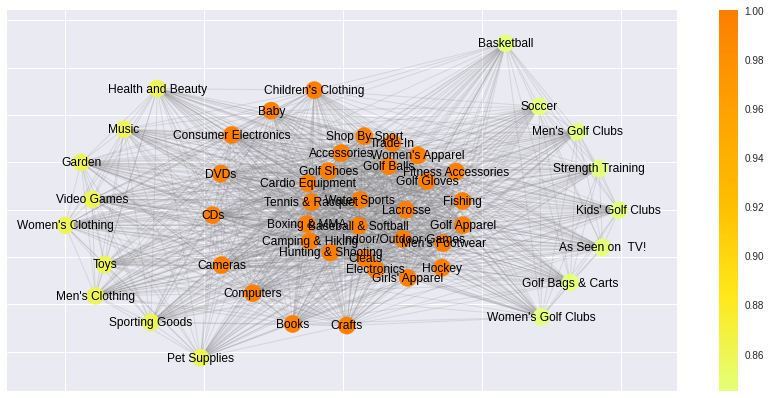

[('Indoor/Outdoor Games', 1.0), ('Golf Balls', 1.0), ('Golf Shoes', 1.0), ('Crafts', 1.0), ('Golf Gloves', 1.0), ('Tennis & Racquet', 1.0), ('Fitness Accessories', 1.0), ('Cleats', 1.0), ("Children's Clothing", 1.0), ('Golf Apparel', 1.0), ('Lacrosse', 1.0), ('Baby', 1.0), ('Fishing', 1.0), ('Books', 1.0), ('DVDs', 1.0), ('CDs', 1.0), ('Accessories', 1.0), ("Girls' Apparel", 1.0), ('Hockey', 1.0), ('Shop By Sport', 1.0), ('Computers', 1.0), ('Cameras', 1.0), ('Consumer Electronics', 1.0), ('Camping & Hiking', 1.0), ("Men's Footwear", 1.0), ('Baseball & Softball', 1.0), ('Hunting & Shooting', 1.0), ('Water Sports', 1.0), ('Trade-In', 1.0), ('Cardio Equipment', 1.0), ('Boxing & MMA', 1.0), ('Electronics', 1.0), ("Women's Apparel", 1.0), ('Music', 0.8596491228070176), ('Health and Beauty', 0.8596491228070176), ('Toys', 0.8596491228070176), ('Video Games', 0.8596491228070176), ('Sporting Goods', 0.8596491228070176), ('Pet Supplies', 0.8596491228070176), ('Garden', 0.8596491228070176), ("Me

Category Name  Closeness Centrality
49  Indoor/Outdoor Games                   1.0
26            Golf Balls                   1.0
43            Golf Shoes                   1.0
21                Crafts                   1.0
41           Golf Gloves                   1.0

In [ ]:
# Closeness Centrality
closeness = nx.closeness_centrality(G)
plot_centrality(closeness)
print_centrality(closeness, 'Closeness Centrality').head()

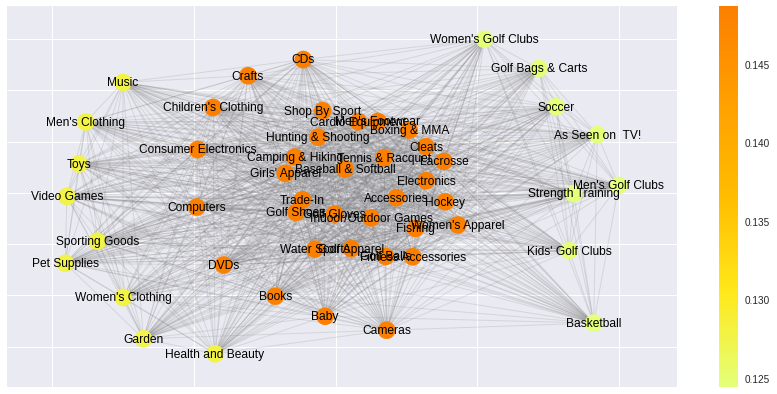

[('Indoor/Outdoor Games', 0.14867064721396608), ("Children's Clothing", 0.14867064721396608), ('Crafts', 0.14867064721396608), ('Golf Gloves', 0.14867064721396608), ('Tennis & Racquet', 0.14867064721396608), ('Fitness Accessories', 0.14867064721396608), ('Cleats', 0.14867064721396608), ('Golf Balls', 0.14867064721396608), ('Lacrosse', 0.14867064721396608), ("Girls' Apparel", 0.14867064721396608), ('Baby', 0.14867064721396608), ('Fishing', 0.14867064721396608), ('Books', 0.14867064721396608), ('DVDs', 0.14867064721396608), ('CDs', 0.14867064721396608), ('Hockey', 0.14867064721396608), ('Golf Shoes', 0.14867064721396608), ('Accessories', 0.14867064721396608), ('Golf Apparel', 0.14867064721396608), ('Water Sports', 0.14867064721396608), ('Shop By Sport', 0.14867064721396608), ("Women's Apparel", 0.14867064721396608), ('Electronics', 0.14867064721396608), ('Boxing & MMA', 0.14867064721396608), ('Cardio Equipment', 0.14867064721396608), ('Trade-In', 0.14867064721396608), ('Hunting & Shootin

Category Name  Eigenvector Centrality
49  Indoor/Outdoor Games                0.148671
28   Children's Clothing                0.148671
21                Crafts                0.148671
41           Golf Gloves                0.148671
23      Tennis & Racquet                0.148671

In [ ]:
# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)
plot_centrality(eigenvector)
print_centrality(eigenvector, 'Eigenvector Centrality').head()

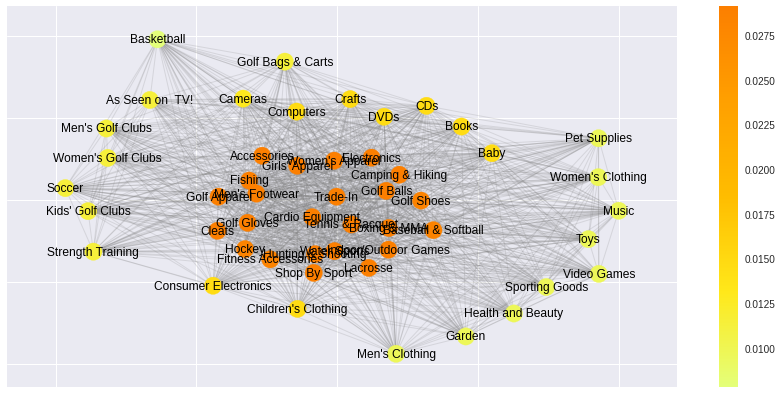

[('Indoor/Outdoor Games', 0.02910004330793566), ("Men's Footwear", 0.02910004330793566), ('Fishing', 0.02910004330793566), ('Lacrosse', 0.02910004330793566), ('Golf Balls', 0.02910004330793566), ('Cleats', 0.02910004330793566), ('Tennis & Racquet', 0.02910004330793566), ('Golf Apparel', 0.02910004330793566), ('Accessories', 0.02910004330793566), ('Camping & Hiking', 0.02910004330793566), ("Girls' Apparel", 0.02910004330793566), ('Cardio Equipment', 0.02910004330793566), ('Water Sports', 0.02910004330793566), ('Shop By Sport', 0.02910004330793566), ("Women's Apparel", 0.02910004330793566), ('Electronics', 0.02910004330793566), ('Boxing & MMA', 0.02910004330793566), ('Hunting & Shooting', 0.02910004330793566), ('Trade-In', 0.02910004330793566), ('Golf Gloves', 0.02910004330793566), ('Hockey', 0.028393028110741375), ('Golf Shoes', 0.028393028110741375), ('Fitness Accessories', 0.028393028110741375), ('Baseball & Softball', 0.028393028110741375), ('Crafts', 0.01460032971973412), ('Computer

Category Name  PageRank
49  Indoor/Outdoor Games    0.0291
11        Men's Footwear    0.0291
31               Fishing    0.0291
29              Lacrosse    0.0291
26            Golf Balls    0.0291

In [ ]:
# PageRank
pagerank = nx.pagerank(G)
plot_centrality(pagerank)
print_centrality(pagerank, 'PageRank').head()

In [ ]:
# Community Detection
df_groupby_secondary = df.groupby([SECONDARY])[PRIMARY].apply(lambda x: sorted(set(x)))
df_groupby_secondary = df_groupby_secondary.reset_index()
# print(df_groupby_secondary.iloc[14][1])
df_groupby_secondary.head()

Order Region                                      Category Name
0           Canada  [Accessories, Baseball & Softball, Boxing & MM...
1        Caribbean  [Accessories, As Seen on  TV!, Baseball & Soft...
2   Central Africa  [Accessories, Baseball & Softball, Boxing & MM...
3  Central America  [Accessories, As Seen on  TV!, Baseball & Soft...
4     Central Asia  [Accessories, Boxing & MMA, Camping & Hiking, ...

In [ ]:
def get_cluster_common_values(cluster):
    commons = []
    for index, row in df_groupby_secondary.iterrows():
        if set(cluster).issubset(row[PRIMARY]):
            commons.append(row[SECONDARY])
    return commons

In [ ]:
def print_communities(node_groups):
    print('Number of communities:', len(node_groups))
    for index, cluster in enumerate(node_groups):
        cluster = sorted(cluster)
        common_values = sorted(get_cluster_common_values(cluster))
        
        print(f'\nCluster {index}:')
        print(f"- {len(cluster)} Nodes: {', '.join(cluster)}")
        print(f"- {len(common_values)} Common values: {', '.join(common_values)}")

In [ ]:
import matplotlib.cm as cm
def plot_communities(nodes, labels):
    cmap = cm.get_cmap('autumn', max(labels) + 1)
    pos = nx.spring_layout(G)

    plt.figure(figsize=(15, 7))
    nx.draw_networkx_nodes(G, pos, nodes, cmap=cmap, node_color=labels)
    nx.draw_networkx_edges(G, pos, edge_color='grey', alpha=0.2)
    nx.draw_networkx_labels(G, pos)
    plt.show()

In [ ]:
# Louvain Algorithm
import community.community_louvain as community_louvain
partition = community_louvain.best_partition(G)
louvain_node_groups = [[] for _ in set(partition.values())]

for node, cluster in sorted(partition.items()):
    louvain_node_groups[cluster].append(node)

Number of communities: 3

Cluster 0:
- 8 Nodes: As Seen on  TV!, Basketball, Golf Bags & Carts, Kids' Golf Clubs, Men's Golf Clubs, Soccer, Strength Training, Women's Golf Clubs
- 3 Common values: Northern Europe, Southern Europe, Western Europe

Cluster 1:
- 18 Nodes: Baby, Books, CDs, Cameras, Children's Clothing, Computers, Consumer Electronics, Crafts, DVDs, Garden, Health and Beauty, Men's Clothing, Music, Pet Supplies, Sporting Goods, Toys, Video Games, Women's Clothing
- 3 Common values: Oceania, South Asia, Southeast Asia

Cluster 2:
- 24 Nodes: Accessories, Baseball & Softball, Boxing & MMA, Camping & Hiking, Cardio Equipment, Cleats, Electronics, Fishing, Fitness Accessories, Girls' Apparel, Golf Apparel, Golf Balls, Golf Gloves, Golf Shoes, Hockey, Hunting & Shooting, Indoor/Outdoor Games, Lacrosse, Men's Footwear, Shop By Sport, Tennis & Racquet, Trade-In, Water Sports, Women's Apparel
- 22 Common values: Canada, Caribbean, Central Africa, Central America, East Africa, East

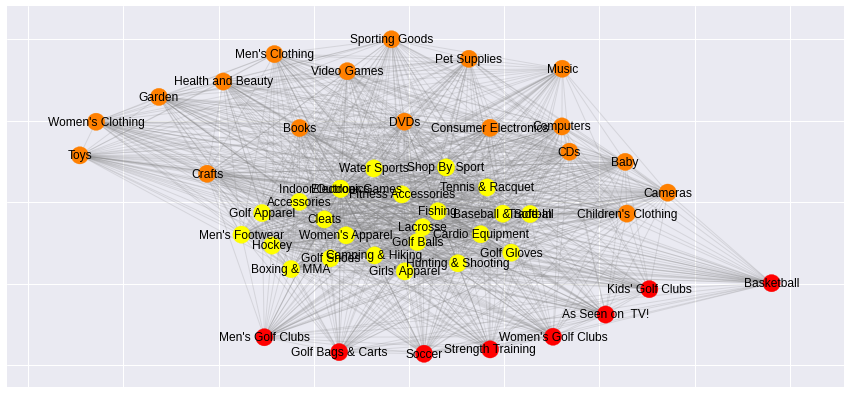

In [ ]:
print_communities(louvain_node_groups)
plot_communities(partition.keys(), list(partition.values()))

In [ ]:
# K-Means Algorithm
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
adj_matrix = nx.to_numpy_array(G)
adj_matrix

array([[ 0.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  0., 23., ...,  4., 23., 23.],
       [ 4., 23.,  0., ...,  4., 23., 23.],
       ...,
       [ 4.,  4.,  4., ...,  0.,  4.,  4.],
       [ 4., 23., 23., ...,  4.,  0., 23.],
       [ 4., 23., 23., ...,  4., 23.,  0.]])

In [ ]:
import numpy as np
distortions = []
K = range(1, 8)

for k in K:
    kmean_model = KMeans(n_clusters=k)
    kmean_model.fit(adj_matrix)
    dist = sum(np.min(cdist(adj_matrix, kmean_model.cluster_centers_, 'euclidean'), axis=1))
    distortions.append(dist / adj_matrix.shape[0])

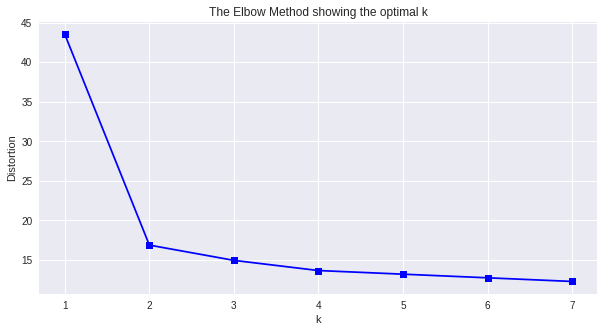

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(K, distortions, 'bs-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(adj_matrix)

kmeans_node_groups = [[] for _ in range(kmeans.n_clusters)]
for node, cluster in zip(G.nodes(), kmeans.labels_):
    kmeans_node_groups[cluster].append(node)

Number of communities: 2

Cluster 0:
- 26 Nodes: As Seen on  TV!, Baby, Basketball, Books, CDs, Cameras, Children's Clothing, Computers, Consumer Electronics, Crafts, DVDs, Garden, Golf Bags & Carts, Health and Beauty, Kids' Golf Clubs, Men's Clothing, Men's Golf Clubs, Music, Pet Supplies, Soccer, Sporting Goods, Strength Training, Toys, Video Games, Women's Clothing, Women's Golf Clubs
- 0 Common values: 

Cluster 1:
- 24 Nodes: Accessories, Baseball & Softball, Boxing & MMA, Camping & Hiking, Cardio Equipment, Cleats, Electronics, Fishing, Fitness Accessories, Girls' Apparel, Golf Apparel, Golf Balls, Golf Gloves, Golf Shoes, Hockey, Hunting & Shooting, Indoor/Outdoor Games, Lacrosse, Men's Footwear, Shop By Sport, Tennis & Racquet, Trade-In, Water Sports, Women's Apparel
- 22 Common values: Canada, Caribbean, Central Africa, Central America, East Africa, East of USA, Eastern Asia, Eastern Europe, North Africa, Northern Europe, Oceania, South America, South Asia, South of  USA, Sout

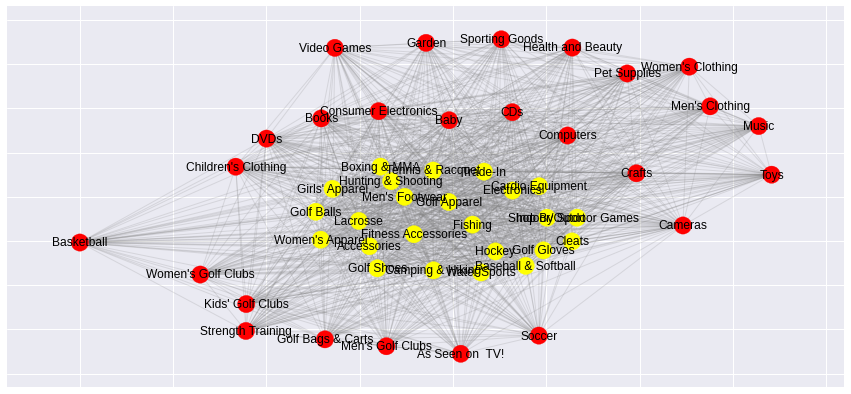

In [ ]:
print_communities(kmeans_node_groups)
plot_communities(G.nodes(), kmeans.labels_)

In [ ]:
# Gaussian Mixture Model(GMM)
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters)
gmm.fit(adj_matrix)

labels = gmm.predict(adj_matrix)
gmm_node_groups = [[] for _ in range(n_clusters)]
for node, cluster in zip(G.nodes(), labels):
    gmm_node_groups[cluster].append(node)

Number of communities: 3

Cluster 0:
- 23 Nodes: Accessories, Baseball & Softball, Boxing & MMA, Camping & Hiking, Cardio Equipment, Cleats, Electronics, Fishing, Fitness Accessories, Girls' Apparel, Golf Apparel, Golf Balls, Golf Gloves, Golf Shoes, Hockey, Hunting & Shooting, Indoor/Outdoor Games, Lacrosse, Men's Footwear, Shop By Sport, Tennis & Racquet, Trade-In, Women's Apparel
- 22 Common values: Canada, Caribbean, Central Africa, Central America, East Africa, East of USA, Eastern Asia, Eastern Europe, North Africa, Northern Europe, Oceania, South America, South Asia, South of  USA, Southeast Asia, Southern Africa, Southern Europe, US Center, West Africa, West Asia, West of USA, Western Europe

Cluster 1:
- 26 Nodes: As Seen on  TV!, Baby, Basketball, Books, CDs, Cameras, Children's Clothing, Computers, Consumer Electronics, Crafts, DVDs, Garden, Golf Bags & Carts, Health and Beauty, Kids' Golf Clubs, Men's Clothing, Men's Golf Clubs, Music, Pet Supplies, Soccer, Sporting Goods, 

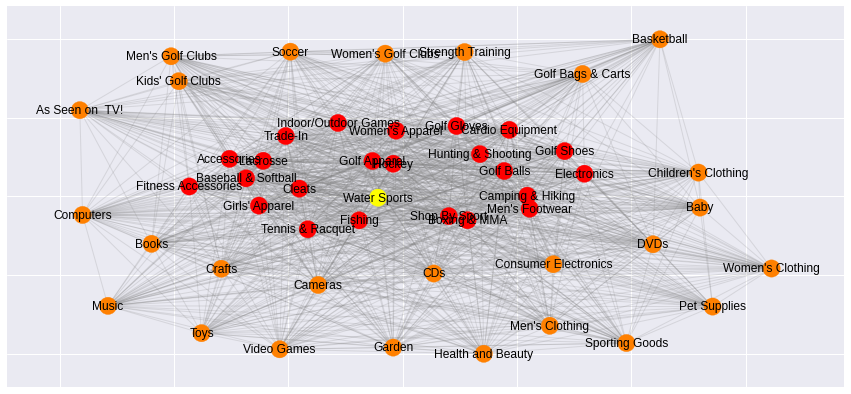

In [ ]:
print_communities(gmm_node_groups)
plot_communities(G.nodes(), labels)